# Exploratory data analysis

El departamento de recursos humanos de una empresa multinacional ha almacenado los datos de las promociones internas del último año. Con estos datos la empresa quiere conocer si existen patrones determinados a la hora de promocionar a un empleado o no. Además esta empresa quiere saber si puede tomar alguna medida en el futuro para orientar la mejora de las carreras profesionales de sus empleados.

Para ello la empresa os pide:

* Realizar un análisis exploratorio de los datos detallando aquellos aspectos más relevantes que hayáis encontrado.
* Construir un modelo de clasificación que prediga la probabilidad de que un empleado sea promocionado o no basandonos en el histórico que tenemos.
* Desarrollar un cuadro de mando con Dash que resuma los aspectos más relevantes que hayáis extraido en el análisis exploratorio y pueda aconsejar a un empleado en las acciones que puede tomar para incrementar su probabilidad de ascenso.

¿Qué recomendaciones le daríais al departamento de recursos humanos basándoos en los datos?

## Información de los datos:
Las variables que tenemos en los datos son las siguientes:

* employee_id: Identificador del empleado
* department: Departamento del empleado
* region: Región del empleado
* educacion: Nivel de estudios
* gender: Género del empleado
* recruitment_channel: Manera en la que el empleado ha sido contratado
* no_of_trainings: Número de formaciones que ha realizado el empleado en el último año
* age: Edad del empleado
* previous_year_rating: Puntuación obtenida en la evaluación durante los años anteriores
* length_of_service: Años de servicio
* awards_won: Si ha ganado algún premio durante el último año
* avg_training_score: Puntuación media de las formaciones realizadas
* is_promoted: 1 si ha sido ascendido y 0 en caso contrario.

# Index

## 1. Data loading and first approach

* **1.1** Load data
* **1.2** Preliminary null value exploration
* **1.3** Preliminary column exploration
    

## 2. Null value treatment

* **2.1** Treating "Training Score" nulls (`avg_training_score`)
* **2.2** Treating "Rating" nulls (`previous_year_rating`)
* **2.3** Treating "Education" nulls (`education`)



# 1. Data loading and first approach

### 1.1 Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/trabajo1.csv')
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0


In [3]:
df.shape

(54808, 13)

In [4]:
df.describe().round(1)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.0,54808.0,54808.0,50684.0,54808.0,54808.0,52248.0,54808.0
mean,39195.8,1.3,34.8,3.3,5.9,0.0,63.7,0.1
std,22586.6,0.6,7.7,1.3,4.3,0.2,13.5,0.3
min,1.0,1.0,20.0,1.0,1.0,0.0,39.0,0.0
25%,19669.8,1.0,29.0,3.0,3.0,0.0,51.0,0.0
50%,39225.5,1.0,33.0,3.0,5.0,0.0,60.0,0.0
75%,58730.5,1.0,39.0,4.0,7.0,0.0,77.0,0.0
max,78298.0,10.0,60.0,5.0,37.0,1.0,99.0,1.0


 ### 1.2 Preliminary null value exploration
 

In [5]:
df.isnull().values.any()

True

What is the percentage of null values?

In [6]:
n_null =  df.isnull().values.sum()
n_null

9093

In [7]:
print(str(round(n_null/df.count().sum() * 100,4)) + "% of entries are null values")

1.2927% of entries are null values


In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

NULLS are located in columns where it makes sense to see them. We will have to decide how to treat each one of them. First impressions suggest:
* education: nulls represent no education
* previous_year_rating: nulls represent no prior ratings
* avg_training_socre: nulls represent no training score

### 1.3 Preliminary column exploration

In [9]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

**Further conclusions regarding a few of the columns**

All employee numbers are unique, there are no repeated employees:

In [10]:
df['employee_id'].nunique() == df.shape[0]

True

Some stats regarding some relevant columns

In [11]:
df[['age','length_of_service', ]].describe()[1:].round(2) # not interested in count

,age,length_of_service
mean,34.80,5.87
std,7.66,4.27
min,20.00,1.00
25%,29.00,3.00
50%,33.00,5.00
75%,39.00,7.00
max,60.00,37.00


In [12]:
df[['previous_year_rating','no_of_trainings', 'avg_training_score', 'awards_won' ]].describe()[1:].round(2)

,previous_year_rating,no_of_trainings,avg_training_score,awards_won
mean,3.33,1.25,63.71,0.02
std,1.26,0.61,13.52,0.15
min,1.00,1.00,39.00,0.00
25%,3.00,1.00,51.00,0.00
50%,3.00,1.00,60.00,0.00
75%,4.00,1.00,77.00,0.00
max,5.00,10.00,99.00,1.00


In [13]:
df['no_of_trainings'].min()

1

**IMPORTANT:** There are no entries where `no_of_trainings` = 0. This indicates that the `Na`values from `average_training_score` **do not** correspond with people that have not done any trainings. This will be treated further on.

## 2. Null value treatment

* **2.1** Treating "Training Score" nulls (`avg_training_score`)
* **2.2** Treating "Rating" nulls (`previous_year_rating`)
* **2.3** Treating "Education" nulls (`education`)


### 2.1 Treating "Training Score" nulls (`avg_training_score` and `previous_year_rating`)

In [14]:
df_null_training_score = df[df['avg_training_score'].isnull()]

In [15]:
df_null_training_score['no_of_trainings'].unique()

array([2, 1, 4, 3, 6, 5, 7], dtype=int64)

In [16]:
df_null_training_score['no_of_trainings'].describe()

count    2560.00000
mean        1.20625
std         0.55671
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         7.00000
Name: no_of_trainings, dtype: float64

Most entries correspond to people with just one training. We may consider this as their "onboarding" training

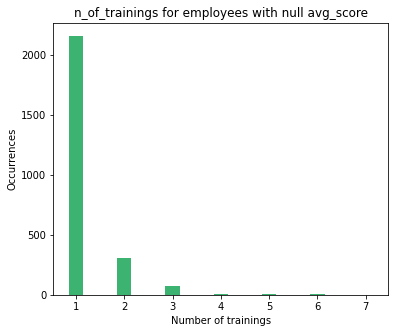

In [17]:
plt.figure(figsize = (6,5))

cat = ['1','2','3','4','5','6','7' ]
count = df_null_training_score.groupby('no_of_trainings').count().iloc[:,0]

plt.bar(cat,count,color = "mediumseagreen",width = 0.3, align = "center")

plt.xlabel("Number of trainings")
plt.ylabel("Occurrences")

plt.title("n_of_trainings for employees with null avg_score")

plt.show()

In [18]:
def plotTrainingScoreForxTrainings(number_of_trainings):
    plt.figure(figsize = (6,5))

    values = df[df['no_of_trainings']==number_of_trainings & df['avg_training_score'].notnull()]['avg_training_score'].values

    plt.hist(values, bins = 40)

    plt.xlabel("Average Training Score")
    plt.ylabel("Occurrences")

    plt.title("Average training score for employees with one training session")

    plt.show()

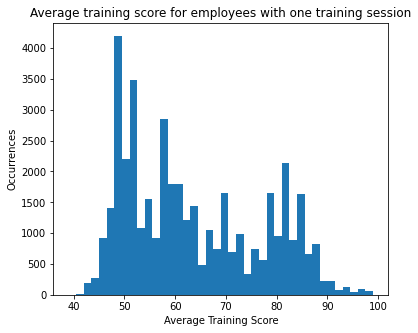

In [19]:
plotTrainingScoreForxTrainings(1)

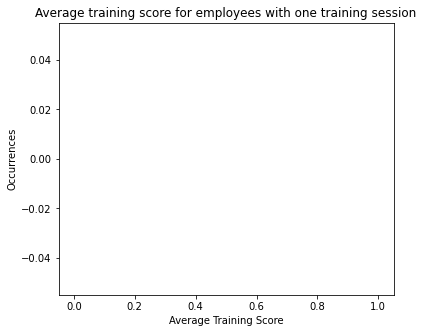

In [20]:
plotTrainingScoreForxTrainings(2)

In [21]:
df[df['no_of_trainings']==2]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85.0,0
13,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,80.0,0
24,52057,Finance,region_22,Master's & above,m,sourcing,2,39,5.0,7,0,59.0,0
31,58536,Finance,region_31,Bachelor's,m,other,2,26,1.0,2,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54786,32291,Sales & Marketing,region_31,Bachelor's,f,sourcing,2,31,1.0,4,0,51.0,0
54788,75164,Sales & Marketing,region_13,Bachelor's,f,sourcing,2,28,3.0,3,0,48.0,0
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,0,51.0,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,52.0,0


In [32]:
import numpy as np
np.linspace(0,0.1,11)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [36]:
{str(int(i*100))+"%": i for i in np.linspace(0,0.1,11)}

{'0%': 0.0,
 '1%': 0.01,
 '2%': 0.02,
 '3%': 0.03,
 '4%': 0.04,
 '5%': 0.05,
 '6%': 0.06,
 '7%': 0.07,
 '8%': 0.08,
 '9%': 0.09,
 '10%': 0.1}